# Credit card fraud check

Essential library and data path statically defined

In [1]:
import numpy as np
import os
import pandas as pd
from os.path import join
import glob # to load large datasets
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings("ignore")

Define data path as following:

In [3]:
dirpath = 'C:/Users/priye/OneDrive/DOCS/python datasets/credit card fraud check/'

print(dirpath)

C:/Users/priye/OneDrive/DOCS/python datasets/credit card fraud check/


In [4]:
all_files = glob.glob(os.path.join(dirpath, "*.csv"))
print(all_files)


['C:/Users/priye/OneDrive/DOCS/python datasets/credit card fraud check\\creditcard.csv']


In [5]:
try:
    sorted(all_files)
    df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
except ValueError:
    filename = input("Enter the single filename:")
    #filename1 = 'datasets_405847_778223_rbi_payment_data_as_on_aug_2019'
    all_files1 = os.path.abspath(f"{dirpath}{filename}.csv")
    print(all_files1)
    df = pd.read_csv(all_files1)

In [6]:
if df.empty:
    print("DataFrame is empty or it is not loaded")
else:
    full_df = df
    nrow, ncol = full_df.shape
    print(f"Number of Rows are: {nrow} and Number of cols are: {ncol}")

Number of Rows are: 3075 and Number of cols are: 12


In [7]:
print("Top 5 rows")
full_df.head()

Top 5 rows


,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [42]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

Define normalization functions

This below functions will be used later

In [8]:
def regularization_l2(data_arr):
    return (data_arr/ np.linalg.norm(data_arr))

In [9]:
def regularization_mean_std_d(data_arr):
    mean = np.mean(data_arr)
    std = np.std(data_arr)
    regulariz_arr = (data_arr - mean)/std
    return regulariz_arr

In [10]:
def sub_mean(data_arr):
    mean = np.mean(data_arr)
    regulariz_arr = (data_arr - mean)
    return regulariz_arr

In [11]:
def max_min_reg(data_arr):
    max_ = np.max(data_arr)
    min_ = np.min(data_arr)
    regulariz_arr = (data_arr - min_)/(max_ -min_)
    return regulariz_arr

Now do a small statistic check, using describe

In [12]:
full_df.describe()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,3.075000e+03,0.0,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,5.026634e+09,NaN,515.026556,9876.399210,0.957398,55.737561,40.022407,0.391870
std,9.870778e+08,NaN,291.906978,10135.331016,2.192391,206.634779,155.968840,1.548479
min,3.160041e+09,NaN,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170814e+09,NaN,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000
50%,5.025578e+09,NaN,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000
75%,5.889625e+09,NaN,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000
max,6.665906e+09,NaN,2000.000000,108000.000000,20.000000,998.000000,998.000000,9.000000


Now check for nulls and irregularities in the dataset

In [13]:
full_df.isnull().sum()

Merchant_id                          0
Transaction date                  3075
Average Amount/transaction/day       0
Transaction_amount                   0
Is declined                          0
Total Number of declines/day         0
isForeignTransaction                 0
isHighRiskCountry                    0
Daily_chargeback_avg_amt             0
6_month_avg_chbk_amt                 0
6-month_chbk_freq                    0
isFradulent                          0
dtype: int64

Check for NA values in the dataset

In [14]:
full_df.isna().sum()

Merchant_id                          0
Transaction date                  3075
Average Amount/transaction/day       0
Transaction_amount                   0
Is declined                          0
Total Number of declines/day         0
isForeignTransaction                 0
isHighRiskCountry                    0
Daily_chargeback_avg_amt             0
6_month_avg_chbk_amt                 0
6-month_chbk_freq                    0
isFradulent                          0
dtype: int64

Plot pie chart and countplot for categorical data: "isFradulent"

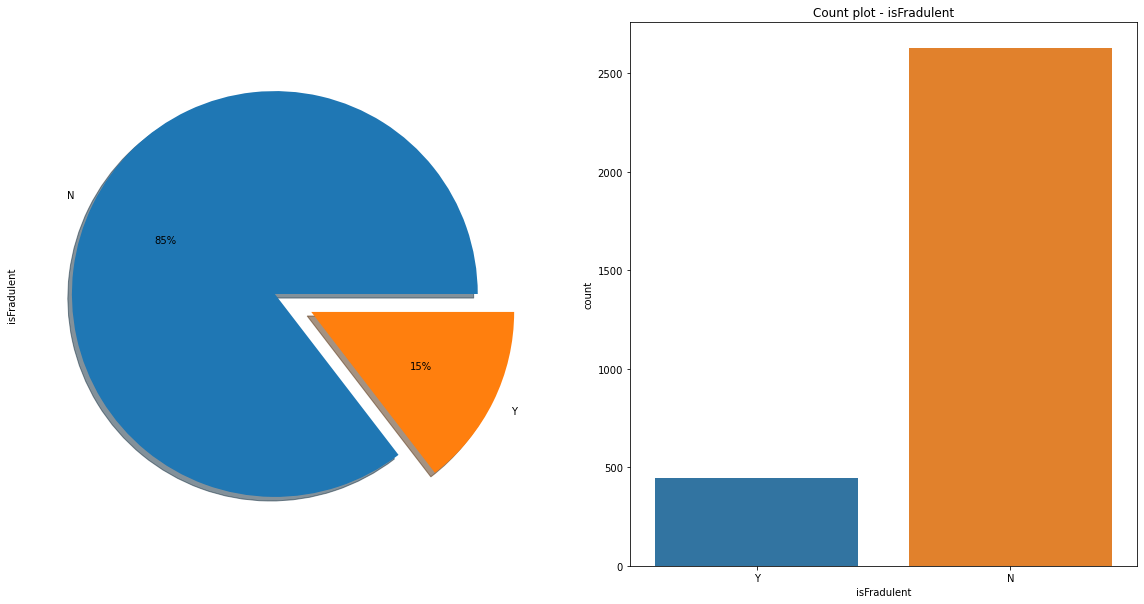

In [15]:
f, ax = plt.subplots(1, 2, figsize = (20,10))

# Plot pie chart
full_df['isFradulent'].value_counts().plot.pie(explode=[0,0.2],
        autopct='%1.f%%', ax=ax[0], shadow=True)

# Plot countplot/bar chart
sns.countplot('isFradulent', data=full_df,ax=ax[1])
ax[1].set_title('Count plot - isFradulent')
plt.show()

Merchant_id and Transaction date are useless data, so remove them.

In [16]:
drop_cols = ["Merchant_id","Transaction date"]

In [17]:
entire_df = full_df.drop(drop_cols,axis=1)

In [18]:
entire_df.columns.values

array(['Average Amount/transaction/day', 'Transaction_amount',
       'Is declined', 'Total Number of declines/day',
       'isForeignTransaction', 'isHighRiskCountry',
       'Daily_chargeback_avg_amt', '6_month_avg_chbk_amt',
       '6-month_chbk_freq', 'isFradulent'], dtype=object)

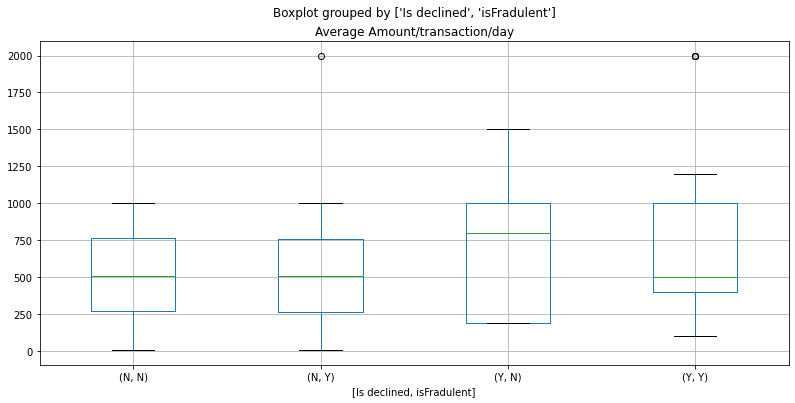

In [60]:
full_df.boxplot(figsize=(13,6),column='Average Amount/transaction/day',by=['Is declined','isFradulent']);

Now have a new df and replace values y/n to 1/0 of column "isFradulent"

In [19]:
model_df = entire_df
model_df["isFradulent"] = model_df["isFradulent"].replace('N',0)
model_df["isFradulent"] = model_df["isFradulent"].replace('Y',1)
# Also if required change Y/N to 1/0

In [20]:
model_df.head()

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,100.0,3000.0,N,5,Y,Y,0,0.0,0,1
1,100.0,4300.0,N,5,Y,Y,0,0.0,0,1
2,185.5,4823.0,Y,5,N,N,0,0.0,0,1
3,185.5,5008.5,Y,8,N,N,0,0.0,0,1
4,500.0,26000.0,N,0,Y,Y,800,677.2,6,1


In [21]:
model_df['Average Amount/transaction/day'].describe()

count    3075.000000
mean      515.026556
std       291.906978
min         4.011527
25%       269.788047
50%       502.549575
75%       765.272803
max      2000.000000
Name: Average Amount/transaction/day, dtype: float64

In [22]:
model_df['Average Amount/transaction/day'].median()

502.5495754

In [23]:
model_df.describe()

,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
count,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,515.026556,9876.399210,0.957398,55.737561,40.022407,0.391870,0.145691
std,291.906978,10135.331016,2.192391,206.634779,155.968840,1.548479,0.352854
min,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000,0.000000
50%,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000,0.000000
75%,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000,0.000000
max,2000.000000,108000.000000,20.000000,998.000000,998.000000,9.000000,1.000000


In [24]:
model_df.median()

Average Amount/transaction/day     502.549575
Transaction_amount                6698.891856
Total Number of declines/day         0.000000
Daily_chargeback_avg_amt             0.000000
6_month_avg_chbk_amt                 0.000000
6-month_chbk_freq                    0.000000
isFradulent                          0.000000
dtype: float64

So from the above 4 statements it is observed that the data is right skewed(mean>median).

# import libraries for model selections

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
df_train,df_test = train_test_split(model_df,test_size=0.25,random_state=42)

In [27]:
df_train['Average Amount/transaction/day'].describe()

count    2306.000000
mean      514.637713
std       292.378478
min         4.011527
25%       270.262249
50%       501.251443
75%       765.345970
max      2000.000000
Name: Average Amount/transaction/day, dtype: float64

Below graph and chart will show extent of outliers 

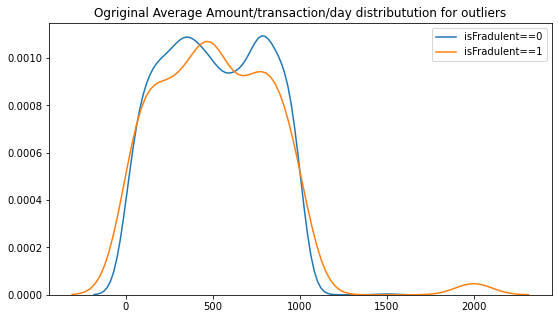

In [34]:
fig, ax= plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['isFradulent']==0]['Average Amount/transaction/day'],ax=ax)
sns.kdeplot(df_train[df_train['isFradulent']==1]['Average Amount/transaction/day'],ax=ax)
plt.legend(['isFradulent==0','isFradulent==1'])
plt.title('Ogriginal Average Amount/transaction/day distributution for outliers')
plt.show()

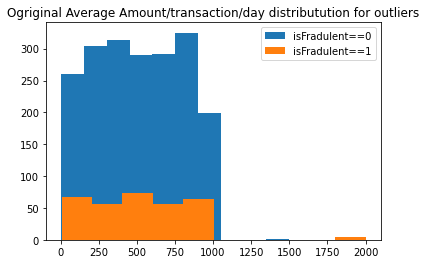

In [38]:
plt.hist(df_train[df_train['isFradulent']==0]['Average Amount/transaction/day'])
plt.hist(df_train[df_train['isFradulent']==1]['Average Amount/transaction/day'])
plt.legend(['isFradulent==0','isFradulent==1'])
plt.title('Ogriginal Average Amount/transaction/day distributution for outliers')
plt.show()

Also try to implement box plot if needed to have a confirm check on outliers. Remove records around 2000

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2306 entries, 2420 to 860
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Average Amount/transaction/day  2306 non-null   float64
 1   Transaction_amount              2306 non-null   float64
 2   Is declined                     2306 non-null   object 
 3   Total Number of declines/day    2306 non-null   int64  
 4   isForeignTransaction            2306 non-null   object 
 5   isHighRiskCountry               2306 non-null   object 
 6   Daily_chargeback_avg_amt        2306 non-null   int64  
 7   6_month_avg_chbk_amt            2306 non-null   float64
 8   6-month_chbk_freq               2306 non-null   int64  
 9   isFradulent                     2306 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 198.2+ KB
